In [25]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph
import math

In [26]:
class AgentState(TypedDict):
    name: str
    age: str
    skills: list[str]
    final_report: str

In [27]:
def first_node(state: AgentState) -> AgentState:
    state['final_report'] = f"Hi {state['name']}."
    return state

In [28]:
def second_node(state: AgentState) -> AgentState:
    state['final_report'] += f"You are {state['age']} years old.\n"
    return state

In [29]:
def third_node(state: AgentState) -> AgentState:
    state['final_report'] += f"You have skills in {", ".join(state["skills"])}"
    return state

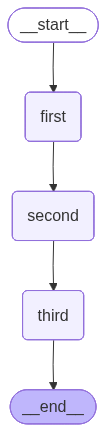

In [30]:
graph = StateGraph(AgentState)  
graph.add_node("first", first_node)
graph.set_entry_point("first")
graph.add_node("second", second_node)
graph.add_edge("first", "second")
graph.add_node("third", third_node)
graph.add_edge("second", "third")
graph.set_finish_point("third")

app = graph.compile()

from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))




In [31]:
result = app.invoke({"name": "Vivek", "age": 30, "skills": ["python", "tableau", "langgraph"]})
print(result["final_report"])


Hi Vivek.You are 30 years old.
You have skills in python, tableau, langgraph
